**Purpose:** To read *Chapter 28* of *Introduction to Data Science* book from Rafa Lab and follow along the codes therein\
**Date:** February 15, 2026

# 1. Packages and data

In [1]:
# Install package
install.packages("dslabs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load packages
library(tidyverse)
library(dslabs)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Warning message in data("polls_2006"):
“data set ‘polls_2006’ not found”
Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


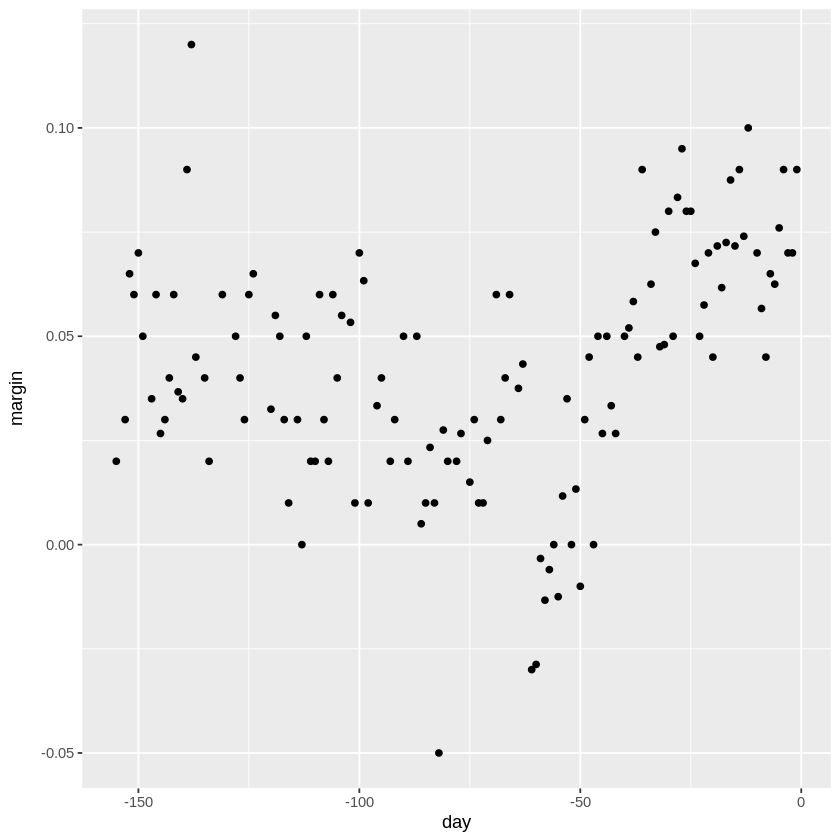

In [3]:
# Visualize the poll data
data("polls_2006")
qplot(day, margin, data = polls_2008)

In [4]:
# Look at the structure of the data
str(polls_2008)

tibble [131 × 2] (S3: tbl_df/tbl/data.frame)
 $ day   : num [1:131] -155 -153 -152 -151 -150 -149 -147 -146 -145 -144 ...
 $ margin: num [1:131] 0.02 0.03 0.065 0.06 0.07 ...


In [5]:
# Summarize the data
summary(polls_2008)

      day              margin        
 Min.   :-155.00   Min.   :-0.05000  
 1st Qu.:-111.50   1st Qu.: 0.02417  
 Median : -72.00   Median : 0.04500  
 Mean   : -74.31   Mean   : 0.04223  
 3rd Qu.: -35.00   3rd Qu.: 0.06083  
 Max.   :  -1.00   Max.   : 0.12000  

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


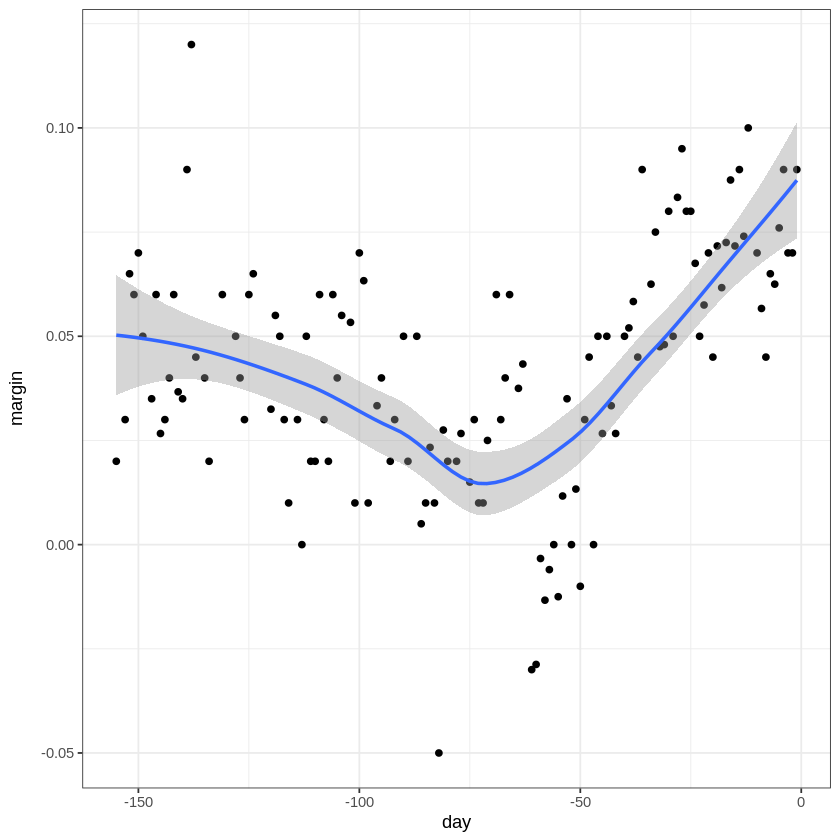

In [14]:
# Geom-smooth
polls_2008 |>
  ggplot(aes(x = day, y = margin)) +
  geom_point() +
  geom_smooth() +
  theme_bw()

# 2. Bin smoothing

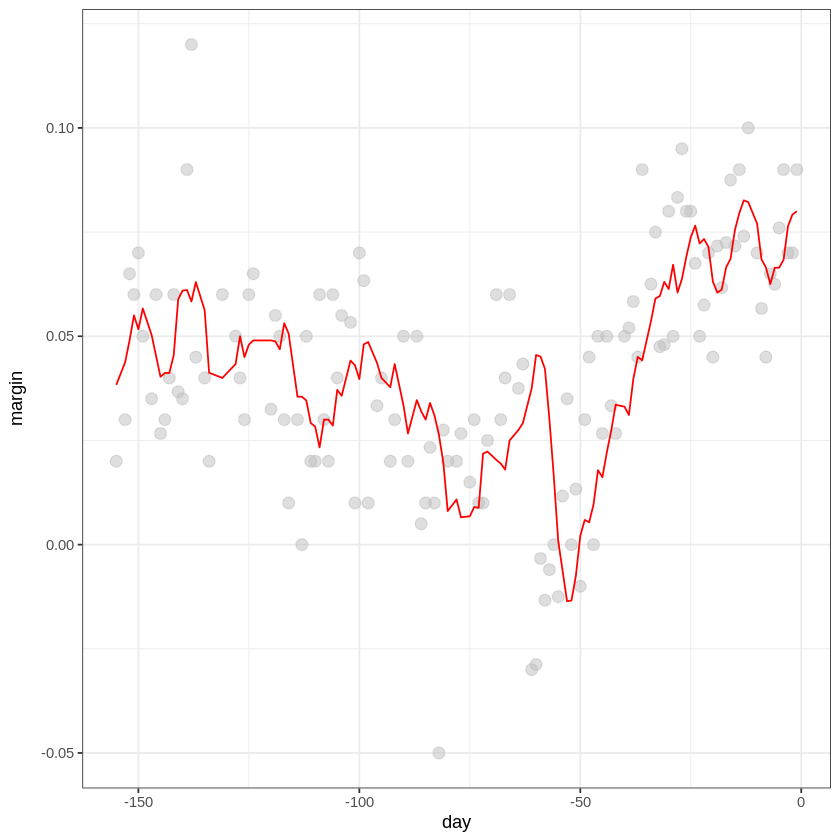

In [17]:
## Kernel smoothing
## with the kernel argument set to box
## so, the line will still be jagged/wiggly
span <- 7 # span of 7 days
fit <- with(polls_2008,
            ksmooth(day, margin, kernel = "box", bandwidth = span)) # kernel smoothing
polls_2008 |>
  mutate(smooth = fit$y) |>
  ggplot(aes(x = day, margin)) +
  geom_point(size = 3, alpha = 0.5, color = "grey") +
  geom_line(aes(day, smooth), color = "red") +
  theme_bw() # visualise the fitted model

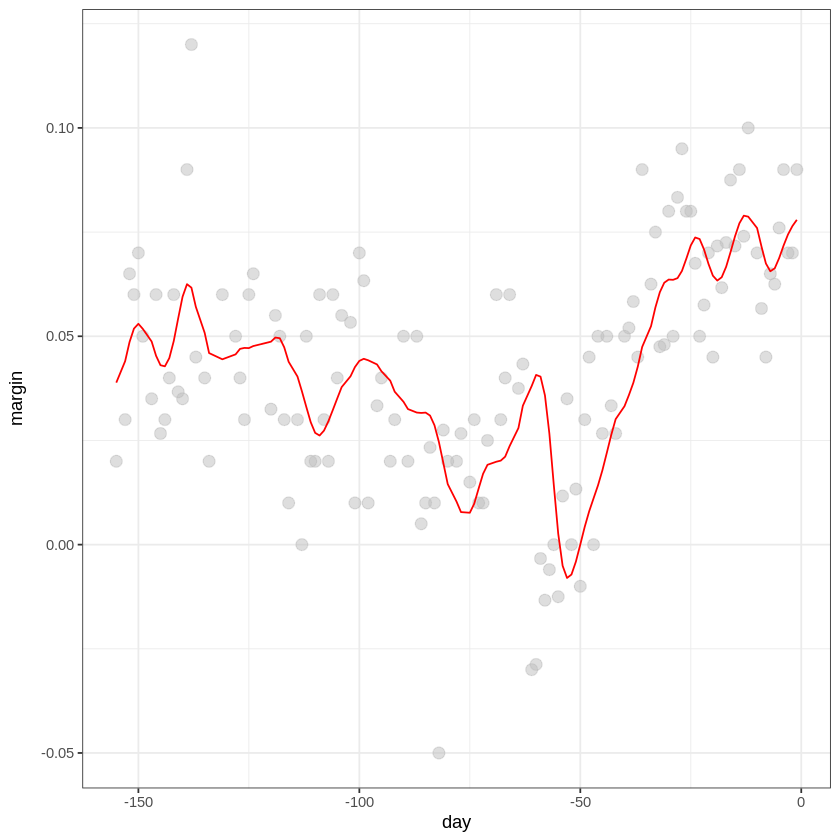

In [19]:
## Kernel smoothing
## with the kernel argument set to normal
## so, the line will be smoother
span <- 7 # span of 7 days
fit <- with(polls_2008,
            ksmooth(day, margin, kernel = "normal", bandwidth = span)) # kernel smoothing
polls_2008 |>
  mutate(smooth = fit$y) |>
  ggplot(aes(x = day, margin)) +
  geom_point(size = 3, alpha = 0.5, color = "grey") +
  geom_line(aes(day, smooth), color = "red") +
  theme_bw() # visualise the fitted model

# 3. Local weighted regression (loess)

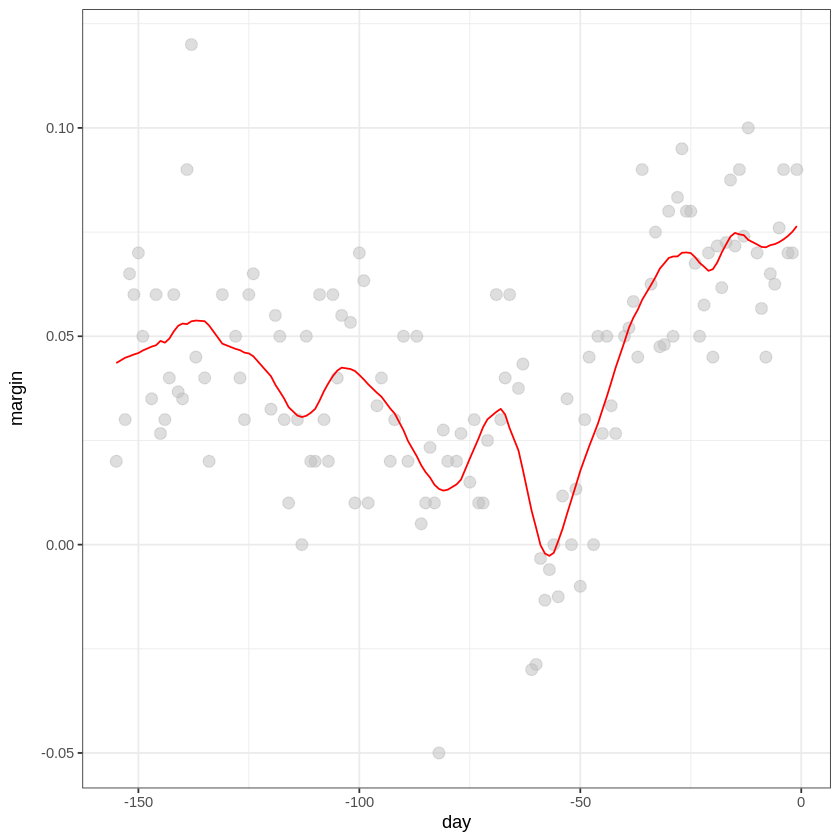

In [24]:
total_days <- diff(range(polls_2008$day))
span <- 21/total_days

fit <- loess(margin ~ day, degree = 1, span = span, data = polls_2008)

polls_2008 |>
  mutate(smooth = fit$fitted) |>
  ggplot(aes(day, margin)) +
  geom_point(size = 3, alpha = 0.5, color = "grey") +
  geom_line(aes(day, smooth), color = "red") +
  theme_bw()

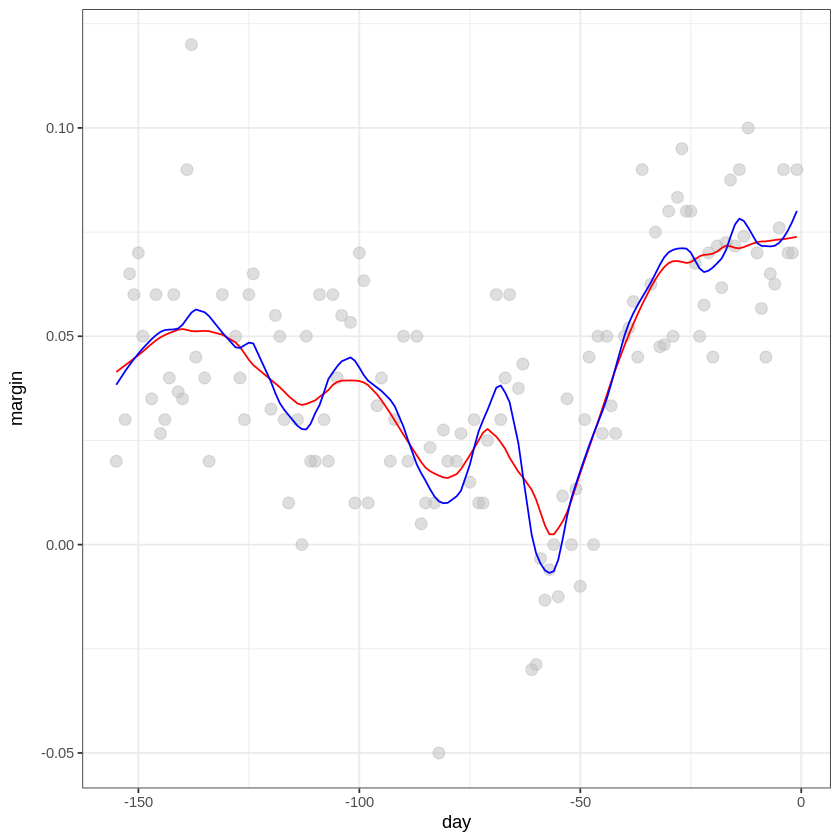

In [26]:
# Fitting a parabola
total_days <- diff(range(polls_2008$day))
span <- 28/total_days
fit_1 <- loess(margin ~ day, degree = 1, span = span, data = polls_2008)
fit_2 <- loess(margin ~ day, degree = 2, span = span, data = polls_2008)

polls_2008 |>
  mutate(smooth_1 = fit_1$fitted, smooth_2 = fit_2$fitted) |>
  ggplot(aes(x = day)) +
  geom_point(aes(y = margin), size =3, alpha = 0.5, color = "grey") +
  geom_line(aes(y = smooth_1), color = "red") +
  geom_line(aes(y = smooth_2), color = "blue") +
  theme_bw()

# 4. Fixing smoothing parameter during visualisation

`geom_smooth()` using formula = 'y ~ x'


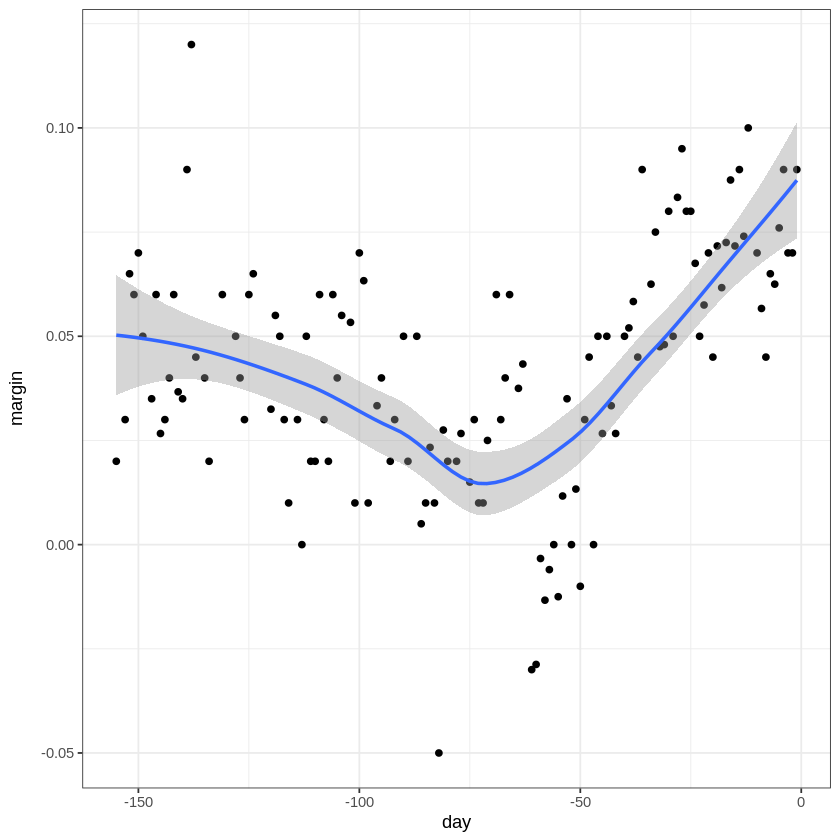

In [28]:
# With default paramters
polls_2008 |>
  ggplot(aes(day, margin)) +
  geom_point() +
  geom_smooth(method = loess) +
  theme_bw()

`geom_smooth()` using formula = 'y ~ x'


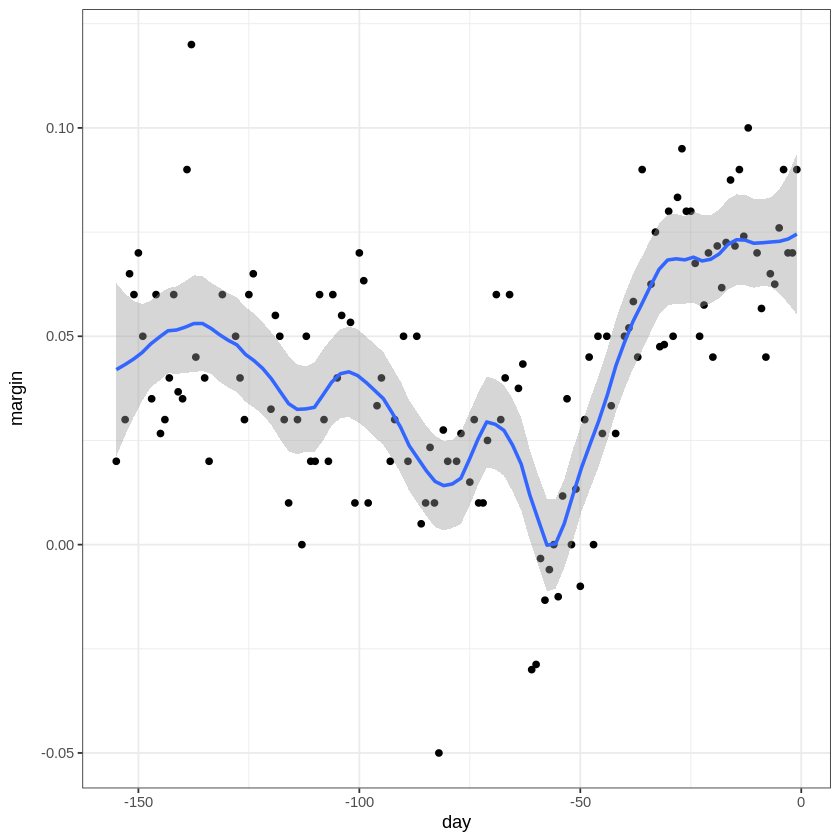

In [29]:
# With custom parameters
polls_2008 |>
  ggplot(aes(day, margin)) +
  geom_point() +
  geom_smooth(method = loess, method.args = list(span = 0.15, degree = 1)) +
  theme_bw()

In [30]:
sessionInfo()

R version 4.5.2 (2025-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] dslabs_0.9.1    lubridate_1.9.4 forcats_1.0.1   stringr_1.6.0  
 [5] dplyr_1.1.4     purrr_1.2.1     readr_2.1.6     tidyr_1.3.2    
 [9] tibble_3.3.1    ggplot2_4.0.1   tidy